Mount Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Imports

In [ ]:
import os
import scipy.io as spio
import math
import time
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import MeanSquaredError

Train Model

In [ ]:



start_time = time.time()

#parameters
num_classes = 2
batch_size = 64
epochs = 100

%cd /content/drive/My Drive/NN\ Input/debug
matname = 'DVBSAPSK_data_23.mat'
mat = spio.loadmat(matname, squeeze_me=True)
x_train = mat['x_train']
#x_train = x_train[0:3]
x_valid = mat['val_data']
#x_valid = x_valid[0:3]
y_valid = mat['val_target']
#y_valid = y_valid[0:3]
y_train = mat['y_train']

matname = 'DVBSAPSK_pred_23.mat'
mat = spio.loadmat(matname, squeeze_me=True)
x_test = mat['train_data']

#cast to float32
x_train = x_train.astype('float32')
x_valid = x_valid.astype('float32')
x_test = x_test.astype('float32') 

print(x_train.shape, 'train samples')
print(x_valid.shape, 'valid samples')

print(y_train.shape, 'train labels')
print(y_valid.shape, 'valid labels')

print('Label Examples:\n', y_train)
print('Input Examples:\n', x_train)

# Define the network
model = Sequential()
model.add(Dense(50, activation='elu', input_dim=18))
model.add(Dense(50, activation='elu'))
model.add(Dense(num_classes, activation='tanh'))

model.summary()

model.compile(loss=keras.metrics.mean_squared_error,
            optimizer=SGD(learning_rate=0.1),
            metrics=[keras.metrics.RootMeanSquaredError(name='rmse')])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=2,
                    validation_data=(x_valid, y_valid))

elapsedTime = (time.time() - start_time)/60
print("--- %.2f minutes ---" % elapsedTime)

score = model.evaluate(x_train, y_train, verbose=2)
print('Final Training MSE:', score[0])
print('Final Training RMSE:', score[1])

Save Model and Training History

In [9]:
#save model
savename = 'DVBSAPSK_100_23.h5'
model.save(savename)
!cp $savename /content/drive/MyDrive/NN\ Output/FFNNEq/Saved\ Models

#save history for graphing  
hist_df = pd.DataFrame(history.history) 

# save to csv: 
hist_csv_file = 'history_DVBSAPSK_100_23.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

!cp $hist_csv_file /content/drive/MyDrive/NN\ Output/FFNNEq/Saved\ Models

predictions = model.predict(x_test)
matname = 'DVBSAPSK_100_23.mat'
spio.savemat(matname, {'pred': predictions})

!cp $matname /content/drive/MyDrive/NN\ Output/FFNNEq/Saved\ Models

Plot losses

/content/drive/MyDrive/NN Output/FFNNEq/Saved Models
cp: 'loss_DVBSAPSK_100_23.png' and '/content/drive/MyDrive/NN Output/FFNNEq/Saved Models/loss_DVBSAPSK_100_23.png' are the same file


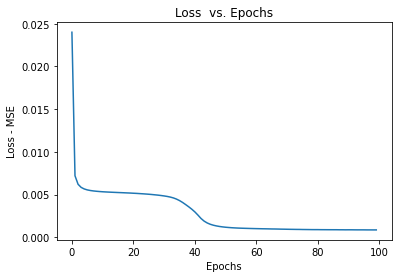

In [10]:
from pandas import read_csv
import matplotlib.pyplot as plt

%cd /content/drive/MyDrive/NN\ Output/FFNNEq/Saved\ Models
hist_csv_file = 'history_DVBSAPSK_100_23.csv'
data = read_csv(hist_csv_file)

loss_data = data['loss']
plt.plot(loss_data)
plt.xlabel('Epochs') 
plt.ylabel('Loss - MSE') 
plt.title("Loss  vs. Epochs")

#save plt
plot_name = 'loss_DVBSAPSK_100_23.png'
plt.savefig(plot_name)
!cp $plot_name /content/drive/MyDrive/NN\ Output/FFNNEq/Saved\ Models

Testing random seed generator theory

In [12]:
#load model 
%cd /content/drive/My Drive/NN\ Output
model = tf.load_model('DVBSAPSK_100_23.h5') #load from google drive
matname = 'DVBSAPSK_pred_23_rngTest.mat'
mat = spio.loadmat(matname, squeeze_me=True)
x_test = mat['train_data']

predictions = model.predict(x_test)
matname = 'DVBSAPSK_100_23_rng.mat'
spio.savemat(matname, {'pred': predictions})